In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

To solve this problem, we first define each theta value (0.3, 0.5, 0.7). We initialize our prior for each of the three games to be a beta distribution with alpha=1 and beta=1, equivalent to a uniform distribution between 0 and 1. We sample from each of these distributions and whichever value is highest, we choose to play the corresponding game. We then see the result of playing the game with the corresponding theta, and with it, we can update our prior into a posterior. We repeat this process for the number of games we play (in the below example 10000). The end result is a selection of the game which is most favorable after a set of trials (exploration followed by exploitation).

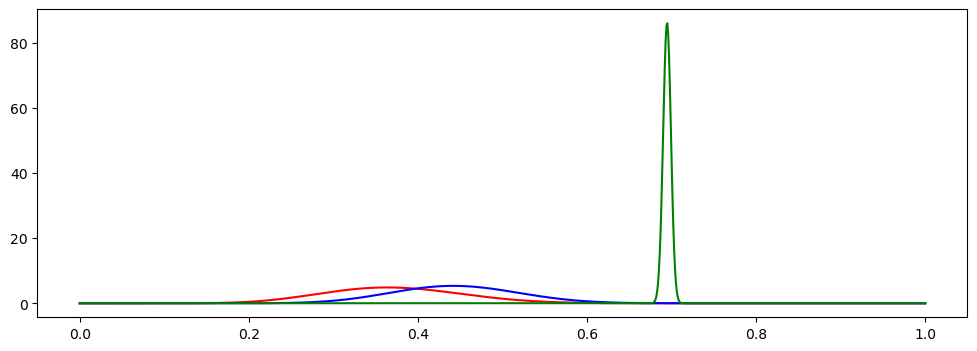

In [2]:
theta_red=0.3
theta_blue=0.5
theta_green=0.7

alpha_red=1
beta_red=1
alpha_blue=1
beta_blue=1
alpha_green=1
beta_green=1

parameter_domain = np.linspace(0,1,1001)

num_samples_red=0
num_samples_blue=0
num_samples_green=0

np.random.seed(2)

for i in range(10000):
    values_red=np.random.beta(a=alpha_red, b=beta_red)
    values_blue=np.random.beta(a=alpha_blue, b=beta_blue)
    values_green=np.random.beta(a=alpha_green, b=beta_green)
    random_value=np.argmax([values_red, values_blue, values_green])
    if random_value==0:
        red_value=stats.bernoulli(p=theta_red).rvs(size=1)[0]
        posterior_red = stats.beta(a=red_value+alpha_red,b=1-red_value+beta_red).pdf(parameter_domain)
        alpha_red+=red_value
        beta_red+=1-red_value
        num_samples_red+=1
    elif random_value==1:
        blue_value=stats.bernoulli(p=theta_blue).rvs(size=1)[0]
        posterior_blue = stats.beta(a=blue_value+alpha_blue,b=1-blue_value+beta_blue).pdf(parameter_domain)
        alpha_blue+=blue_value
        beta_blue+=1-blue_value
        num_samples_blue+=1
    elif random_value==2:
        green_value=stats.bernoulli(p=theta_green).rvs(size=1)[0]
        posterior_green = stats.beta(a=green_value+alpha_green,b=1-green_value+beta_green).pdf(parameter_domain)
        alpha_green+=green_value
        beta_green+=1-green_value
        num_samples_green+=1
    else:
        print("Error")
    
plt.figure(figsize=(12,4));
plt.plot(parameter_domain, posterior_red, label="posterior", color='red')
plt.plot(parameter_domain, posterior_blue, label="posterior", color='blue')
plt.plot(parameter_domain, posterior_green, label="posterior", color='green')

In [3]:
print(num_samples_red)
print(num_samples_blue)
print(num_samples_green)

33
43
9924
